In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [97]:
data = pd.read_csv('/Users/ira_aghababyan/Desktop/ML Course/Programming/Linear Regression/Ecommerce.csv')
data.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [98]:
df = data.drop(['Email', 'Address', 'Avatar'], axis = 1)

### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(18.125, 0.5, 'Yearly Amount Spent')

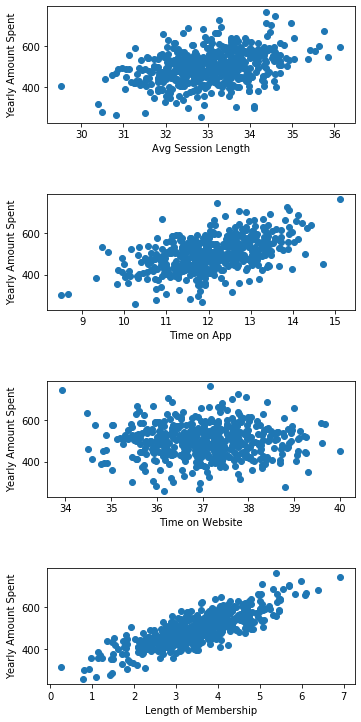

In [99]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)


axs[0].scatter(data['Avg Session Length'], data['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(data['Time on App'], data['Yearly Amount Spent'])
axs[1].set_xlabel('Time on App')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(data['Time on Website'], data['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(data['Length of Membership'], data['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')


In [100]:
df.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### Leave only one feature that has a linear relationship with the target variable.

In [101]:
X = df[['Length of Membership']]
Y = df['Yearly Amount Spent']

### Divide the dataset into training and test sets with the ratio 80:20.

In [102]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [103]:
len(xTrain), len(xTest)

(400, 100)

In [104]:
xTrain.head()

,Length of Membership
249,3.634996
433,2.117383
19,4.064549
322,4.086566
332,2.190132


In [105]:
xTest.head()

,Length of Membership
361,3.434560
73,3.851579
374,4.238296
155,2.941411
104,3.428860


In [106]:
yTrain.head()

249    518.786483
433    434.144202
19     605.061039
322    478.262126
332    424.202827
Name: Yearly Amount Spent, dtype: float64

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [107]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    data_vector['ones'] = 1
    data_vector = data_vector[['ones', 'Length of Membership']]
    beta = np.linalg.inv(data_vector.T.dot(data_vector)).dot(data_vector.T).dot(response_vector)
    
    return beta

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [108]:
def plot_fitted_line(b0,
                     b1,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    a = plt.scatter(X,Y,color = 'k')
    b = plt.plot(X, b0+b1*X, color = 'b', lw = 5)
    plt.title = "Regression line TV vs Sales"
    plt.xlabel("Length of Membership")
    plt.ylabel("Yearly Amount Spent")
    plt.show()


In [109]:
b0,b1 = fit_1d_linear_regression(xTrain, yTrain)
b0,b1

/Users/ira_aghababyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(271.3521128033929, 64.64010065386728)

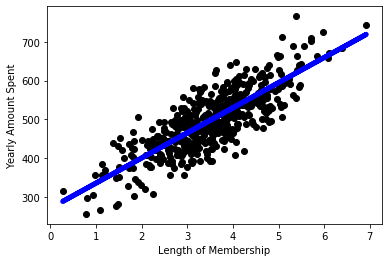

In [110]:
plot_fitted_line(b0, b1, xTrain, yTrain, 'Linear Regression Line')

### Plot example

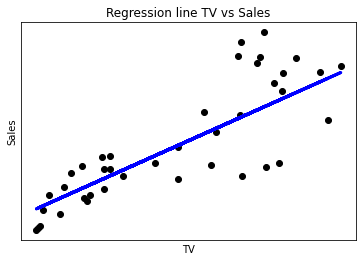

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

271.35211280339314 [64.64010065]


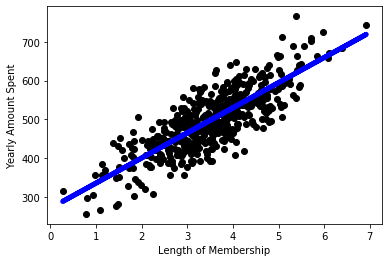

In [111]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xTrain[['Length of Membership']], yTrain)
b0_, b1_ = model.intercept_, model.coef_

print(b0_, b1_)

plot_fitted_line(b0, b1, xTrain, yTrain, 'Linear Regression Line')

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_sklearn = model.predict(x_test.values.reshape(-1,1))
y_pred_custom = b0 + b1 * x_test


print('MAE cusom: ', mean_absolute_error(yTest, y_pred_custom))
print('MAE sklearn: ', mean_absolute_error(y_test, y_pred_sklearn),'\n')


print('MSE cusom: ', mean_squared_error(yTest, y_pred_custom))
print('MSE sklearn: ', mean_squared_error(yTest, y_pred_sklearn),'\n')


print('RMSE cusom: ', np.sqrt(mean_squared_error(yTest, y_pred_custom)))
print('RMSE sklearn: ', np.sqrt(mean_squared_error(yTest, y_pred_sklearn)),'\n'"")

print('R2 cusom: ', r2_score(y_test, y_pred_custom))
print('R2 sklearn: ', r2_score(y_test, y_pred_sklearn))

MAE cusom:  37.83623390033245
MAE sklearn:  79.60521997120902 

MSE cusom:  2162.1116327764266
MSE sklearn:  2162.1116327764244 

RMSE cusom:  46.498512156588696
RMSE sklearn:  46.49851215658867 

R2 cusom:  -0.6345256026427417
R2 sklearn:  -0.6345256026427397


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [66]:
model = LinearRegression()
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df[df.columns.difference(['Yearly Amount Spent'])]
y = df['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print('MAE: ', mean_absolute_error(y_test, y_pred))

print('MSE: ', mean_squared_error(y_test, y_pred))

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

print('R-squared: ', r2_score(y_test, y_pred)) 

MAE:  8.575101376554272
MSE:  111.06329597249922
RMSE:  10.538657218664017
R-squared:  0.9819676748095942
